# **Step 1: Notebook to Create ML Model**
Predict **penguin species** given measurements of the bill, flippers, and body mass, and knowledge about penguin's sex and location

### **Installing `scikit-learn`**

1. To install `scikit-learn` using `pip`, run the following command: `pip install -U scikit-learn`
2. To install `scikit-learn` using `conda`, run the following command: `conda install -c conda-forge scikit-learn`

In [1]:
#!pip install -U scikit-learn

---


### **Import Libraries**

In [2]:
import pandas as pd                  # Pandas
import numpy as np                   # Numpy
from matplotlib import pyplot as plt # Matplotlib
import seaborn as sns                # Seaborn

# Package to implement Decision Tree Model
import sklearn
from sklearn.tree import DecisionTreeClassifier

# Package for data partitioning
from sklearn.model_selection import train_test_split

# Package to visualize Decision Tree
from sklearn import tree

# Package for generating confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Package for generating classification report
from sklearn.metrics import classification_report

# Module to save and load Python objects to and from files
import pickle 

%matplotlib inline

# Display inline plots as vector-based (svg)
%config InlineBackend.figure_formats = ['svg']

### **Load Dataset as DataFrame**

In [3]:
penguin_df = pd.read_csv('penguins.csv')
penguin_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [4]:
# Dropping null values
penguin_df.dropna(inplace = True)
penguin_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
 7   year               333 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 23.4+ KB


In [5]:
# Distribution of Species column
penguin_df['species'].value_counts(normalize = True)

species
Adelie       0.438438
Gentoo       0.357357
Chinstrap    0.204204
Name: proportion, dtype: float64

### **Select Input and Output Features**

In [6]:
# Output column for prediction
output = penguin_df['species'] 

# Input features (excluding year column)
features = penguin_df[['island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']]

### **One-hot Encoding to Handle Categorical Variables**

`pd.get_dummies()` is a Pandas function that converts categorical variables into numeric (dummy) variables.

In [7]:
cat_var = ['island', 'sex']
features_encoded = pd.get_dummies(features, columns = cat_var)

features_encoded.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe,island_Dream,island_Torgersen,sex_female,sex_male
0,39.1,18.7,181.0,3750.0,False,False,True,False,True
1,39.5,17.4,186.0,3800.0,False,False,True,True,False
2,40.3,18.0,195.0,3250.0,False,False,True,True,False
4,36.7,19.3,193.0,3450.0,False,False,True,True,False
5,39.3,20.6,190.0,3650.0,False,False,True,False,True


### **Data Partitioning**

In [8]:
train_X, test_X, train_y, test_y = train_test_split(features_encoded, output, test_size = 0.2, random_state = 1) 

- `test_size`: Amount of data to be used for testing.

- `random_state`: Sets a seed for random number generation, ensuring the split is reproducible (same train/test sets every time you run it)

## **Prediction Modeling using Decision Tree**

In [9]:
# Defining prediction model
clf = DecisionTreeClassifier(random_state = 0)

# Fitting model on training data
clf.fit(train_X, train_y)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


### **Visualizing Trained Decision Tree Model**

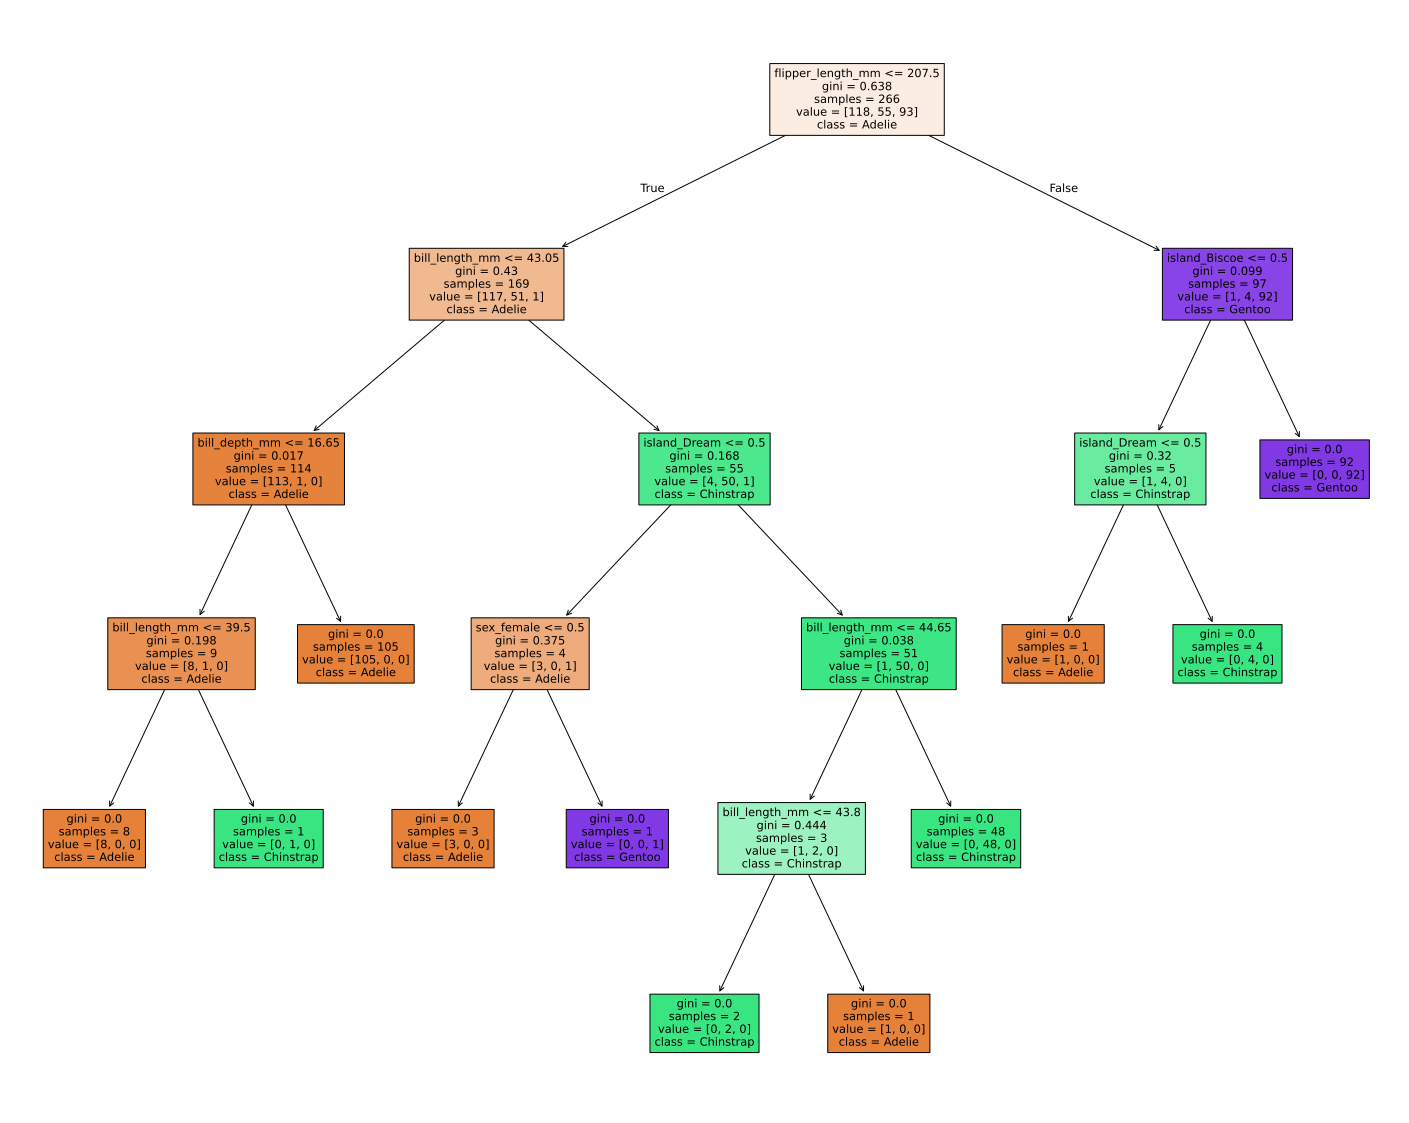

In [10]:
fig = plt.figure(figsize = (25,20))
a = tree.plot_tree(decision_tree = clf,
                   max_depth = None,
                   feature_names = train_X.columns,
                   class_names = clf.classes_,
                   filled = True)

# Saving Decision Tree
fig.savefig("dt_visual.svg", bbox_inches = 'tight')

### **Model Evaluation**

#### **Evaluation on Train Set**

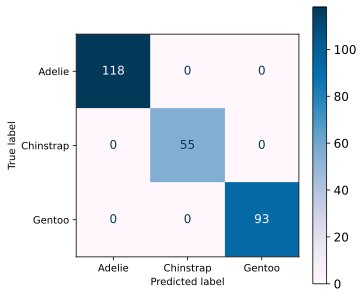

In [11]:
# Predictions on training set
y_pred_train = clf.predict(train_X)

# Now generate confusion matrix
cm = confusion_matrix(train_y, y_pred_train, labels = clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf.classes_)

# Specify figure size
fig, ax = plt.subplots(figsize = (5, 5))
plt.rcParams.update({'font.size': 12})

# Display Confusion Matrix
disp.plot(cmap = 'PuBu', ax = ax);

#### **Evaluation on Test Set**

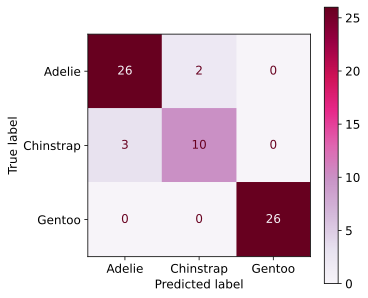

In [12]:
# Predictions on test set
y_pred = clf.predict(test_X)

# Now generate confusion matrix
cm = confusion_matrix(test_y, y_pred, labels = clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf.classes_)

# Specify figure size
fig, ax = plt.subplots(figsize = (5, 5))
plt.rcParams.update({'font.size': 12})

# Display Confusion Matrix
disp.plot(cmap = 'PuRd', ax = ax)

# Save as SVG
plt.savefig("confusion_mat.svg", bbox_inches = 'tight');

**Choosing Colormaps in Matplotlib**: [**Check this link**](https://matplotlib.org/stable/tutorials/colors/colormaps.html)

#### **Classification Report**

In [13]:
report = classification_report(test_y, y_pred, output_dict = True)
report_df = pd.DataFrame(report)
report_df

# Save the report as a CSV File
report_df.to_csv('class_report.csv') 

#### **Feature Importance Analysis**

It helps answer questions like:
**“Which features are most important in determining the output?”**

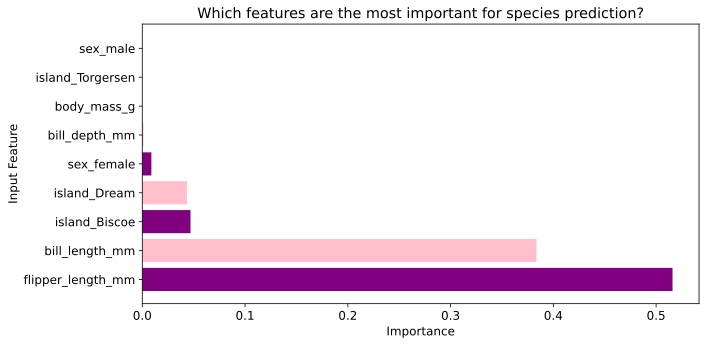

In [14]:
# Storing importance values from the trained model
importance = clf.feature_importances_

# Storing feature importance as a dataframe
feature_imp = pd.DataFrame(list(zip(train_X.columns, importance)),
               columns = ['Feature', 'Importance'])

feature_imp = feature_imp.sort_values('Importance', ascending = False).reset_index(drop = True)

# Bar plot
plt.figure(figsize = (10, 5))
plt.barh(feature_imp['Feature'], feature_imp['Importance'], color = ['purple', 'pink'])

plt.xlabel("Importance")
plt.ylabel("Input Feature")
plt.title('Which features are the most important for species prediction?') 
plt.tight_layout()
plt.savefig("feature_imp.svg");

## **Save Your Prediction Model**

**Using Pickle**

 <img src="https://d33wubrfki0l68.cloudfront.net/0f66116c250285870171e38f309161bafc25f06b/dbd4c/assets/images/posts/pickled-cabbage.jpg" width="350" style="float: center"/>

**Pickle** is a useful Python tool that allows you to save your ML models, to minimise lengthy re-training and allow you to share, commit, and re-load pre-trained machine learning models.

In [15]:
# Pickle file: saving the trained DT model
# Creating the file where we want to write the model
dt_pickle = open('decision_tree_penguin.pickle', 'wb') 

# Write DT model to the file
pickle.dump(clf, dt_pickle) 

# Close the file
dt_pickle.close() 